# <font color=#f06969>Evaluation of Synthetic Data</font>

## PRISM dataset evaluation from synthetic data generated on 03/09/2020
<hr>

The following jupyter notebook evaluates the distribution, fidelity and usefulness of the synthetic data synthesised for the PRISM dataset.<br>
The evaluation methods included are:
#### 1. Distribution evaluation methods:
[1.1 Numerical variables distribution comparison](#hist_link)
<br>[1.2 Categorical variables distribution comparison](#cat_link)
<br>[1.3 Pearson's Correlation Coefficient comparison](#pearsons_link)

#### 2. Fidelity evaluation methods:
[2.1 tSNE and PCA plots comparison](#tSNE_PCA_link)
<br>[2.2 Discriminative model performance](#discrim_link)
<br>[2.3 Autocorrelation comparison](#auto_link)

#### 3. Usefulness evaluation methods:
[3.1 Predictive model performance comparison](#pred_link)
<br>[3.2 Next-step predictive model performance comparison](#tpred_link)

<hr>

# <font color=#0275D8>Importing Packages</font>

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score

from evaluation.helper_eval import *
from evaluation.distributions_eval import *
from evaluation.fidelity_eval import *
from evaluation.predictive_eval import *

<hr>

# <font color=#0275D8>Data Loading and Preparation </font>

In [2]:
# specify numerical columns
num_cols = ['ab_pain_dur', 'age', 'aneroxia_dur', 'plasmodium_density',
               'cough_dur', 'diarrhea_dur', 'fatigue_dur', 'fever_dur', 'headache_dur',
               'height', 'hemoglobin', 'joint_pain_dur', 'muscle_ache_dur', 'temp',
               'vomit_dur', 'weight', 'dday', 'first_dday']

# specify categorical columns
cat_cols = ['complicated_malaria_no',
    'complicated_malaria_not_assessed', 'complicated_malaria_yes',
    'febrile_no', 'febrile_yes', 'ITN_no', 'ITN_not_applicable', 'ITN_yes',
    'malaria_no', 'malaria_yes',
    'malaria_parasite_blood_smear_indicated_but_not_done',
    'malaria_parasite_blood_smear_negative_/_lamp_negative',
    'malaria_parasite_blood_smear_negative_/_lamp_not_done',
    'malaria_parasite_blood_smear_negative_/_lamp_positive',
    'malaria_parasite_blood_smear_not_indicated',
    'malaria_parasite_blood_smear_positive_/_no_malaria',
    'malaria_parasite_symptomatic_malaria',
    'malaria_treatment_artmether-lumefantrine_for_uncomplicated_malaria',
    'malaria_treatment_no_malaria_medications_given',
    'malaria_treatment_quinine_for_uncomplicated_malaria_in_the_1st_trimester_of_pregnancy',
    'malaria_treatment_quinine_for_uncomplicated_malaria_within_14_days_of_a_previous_treatment_for_malaria',
    'malaria_treatment_quinine_or_artesunate_for_complicated_malaria',
    'plasmodium_gametocytes_no', 'plasmodium_gametocytes_yes',
    'plasmodium_lamp_negative', 'plasmodium_lamp_no_result',
    'plasmodium_lamp_positive', 'visit_type_enrollment',
    'visit_type_scheduled_visit', 'visit_type_unscheduled_visit']

In [3]:
# load in original and generated (intermediate) csv
ori = pd.read_csv('data_attr/ori_prism_cleaned.csv')
gen = pd.read_csv('data_attr/gen_prism_int_e200.csv')

# get numerical and categorical columns for original and generated data
ori_num = get_numerical_columns_df(ori, num_cols)
gen_num = get_numerical_columns_df(gen, num_cols)
ori_cat = get_categorical_columns_df(ori, cat_cols)
gen_cat = get_categorical_columns_df(gen, cat_cols)

# turn dataframe into 3D np arrays (both cat and num data)
ori_3d = Stack2DSequence(ori) #shape (1347,130,48)
gen_3d = Stack2DSequence(gen) #shape (1347,130,48)

# turn dataframe into 3D np arrays of only numerical or categorical data
ori_3d_num = Stack2DSequence(get_numerical_columns_df(ori, num_cols, return_id=True))
gen_3d_num = Stack2DSequence(get_numerical_columns_df(gen, num_cols, return_id=True))
ori_3d_cat = Stack2DSequence(get_categorical_columns_df(ori, cat_cols, return_id=True))
gen_3d_cat = Stack2DSequence(get_categorical_columns_df(gen, cat_cols, return_id=True))

# get the original tsv and final csv output for autocorrelation
ori_auto = pd.read_csv("../../isaFull.tsv", '\t')
gen_auto = pd.read_csv('data_attr/gen_prism_at_final_e200.csv')
#remove <5 visits from original original data to match the generated data.
ori_auto_5above = ori_auto[ori_auto.groupby('Participant_Id')['Participant_Id'].transform('size') >= 5].reset_index(drop=True)

In [4]:
# create a dictionary for the case where we want to loop through multiple sets of real and gen data
synthetic_data_dic = {'DoppelGANger_0903':[ori, gen]}
synthetic_num_dic = {'DoppelGANger_0903':[ori_num, gen_num]}
synthetic_cat_dic = {'DoppelGANger_0903':[ori_cat, gen_cat]}
synthetic_array_dic = {'DoppelGANger_0903':[ori_3d, gen_3d]}
synthetic_array_num_dic = {'DoppelGANger_0903':[ori_3d_num, gen_3d_num]}
synthetic_array_cat_dic = {'DoppelGANger_0903':[ori_3d_cat, gen_3d_cat]}
syn_keys = list(synthetic_data_dic.keys())
n = len(syn_keys)

<hr>

# <font color=#0275D8> 1. Distribution evaluation</font>

<a id = "hist_link" Here ></a>

## <font color=#472F91> 1.1 Numerical variables distribution comparison </font>

### <u> Method description </u>

For numerical columns, histograms for the original dataset and the generated dataset are overlaid for each column, giving a visual perception of the similarity in diversity and distribution.
To quantify this, a Kolmogrov-Smirnov Test is performed with 100 randomly selected samples to avoid biasing the result towards rejecting the null hypothesis. The Kolmogrov-Smirnov Test is a non parametric hypothesis test where the null hypothesis is that two samples (one from the original and one from the synthetic) originate from the same distribution.
<br><b>The closer the Kolmogrov-Smirnov Test p-value is to 1, the higher the fidelity</b>

### <u> Results </u>

Overlays of original and generated histograms (probability density function) and corresponding cumulative distribution function for each column of the dataset.

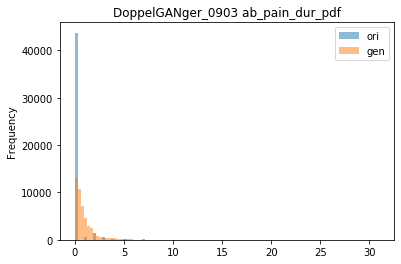

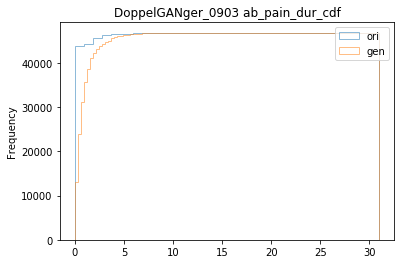

K-S test result: [9.10000000e-01 3.49331069e-38]


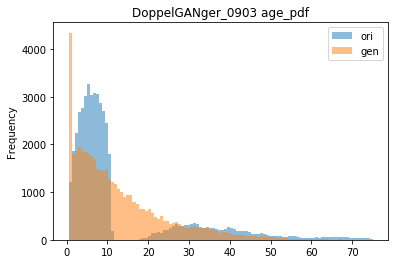

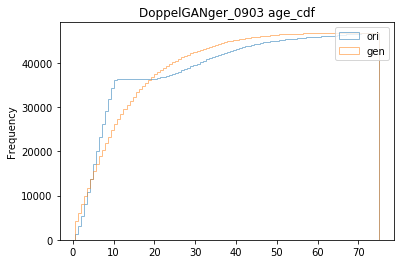

K-S test result: [0.233      0.06200238]


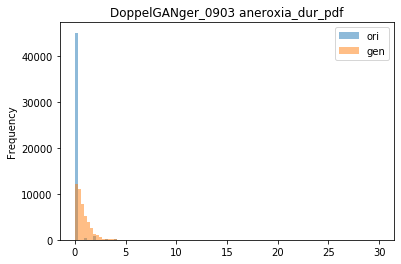

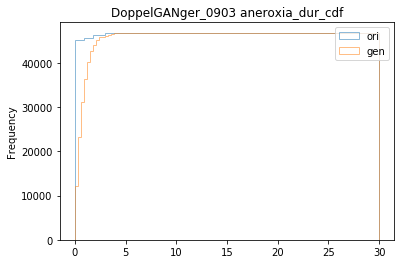

K-S test result: [9.6300000e-01 3.7007131e-49]


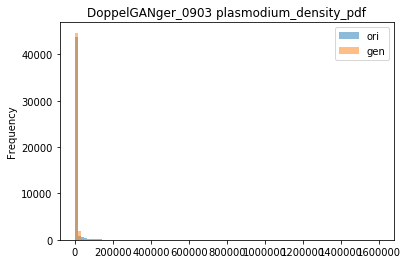

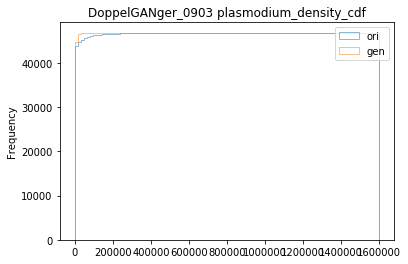

K-S test result: [8.47000000e-01 4.39474912e-34]


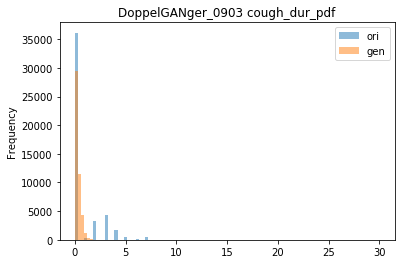

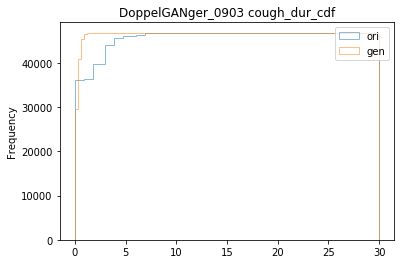

K-S test result: [4.87000000e-01 1.90914138e-07]


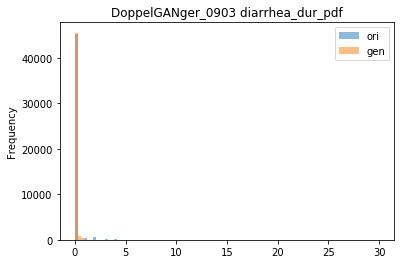

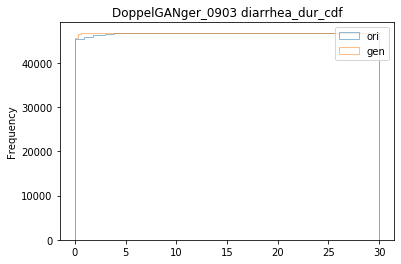

K-S test result: [5.75000000e-01 1.28773456e-13]


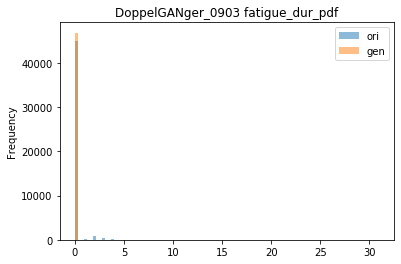

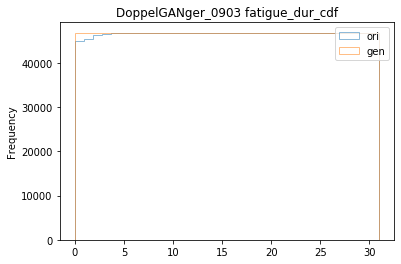

K-S test result: [8.73000000e-01 2.48560374e-31]


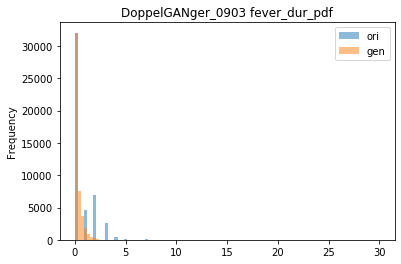

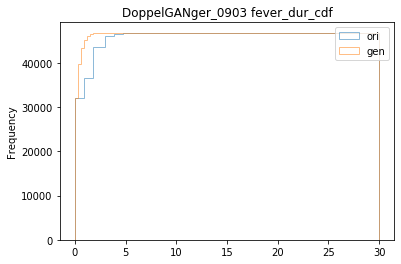

K-S test result: [0.296      0.00137657]


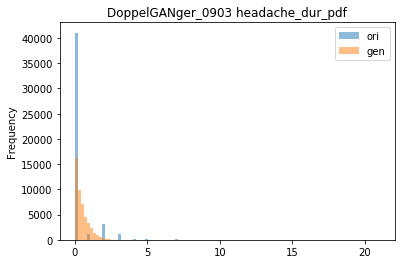

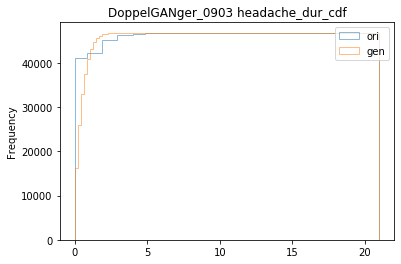

K-S test result: [8.69000000e-01 5.32471773e-35]


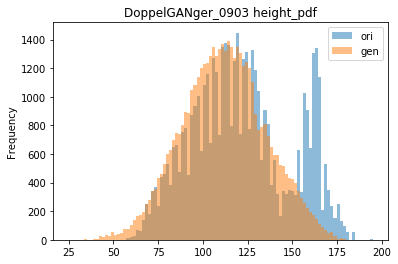

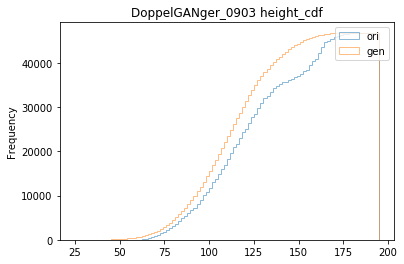

K-S test result: [0.19       0.11762714]


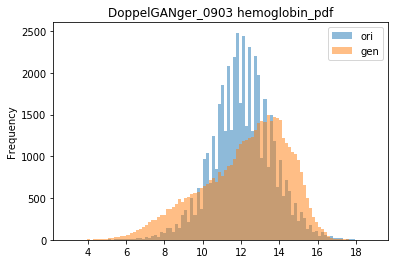

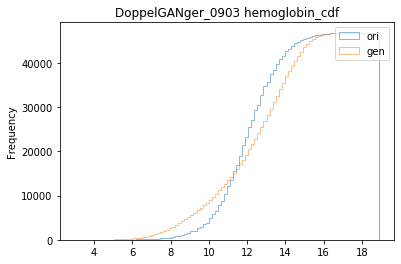

K-S test result: [0.238      0.03155625]


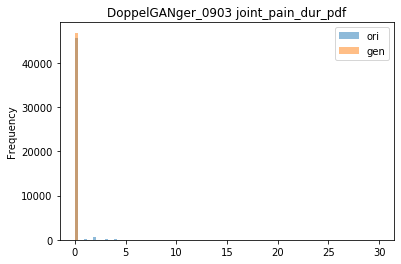

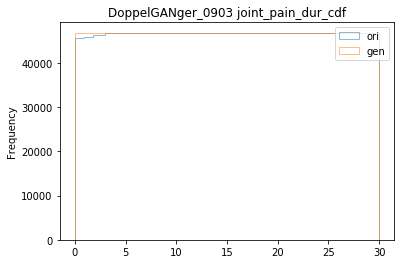

K-S test result: [0.027      0.99939237]


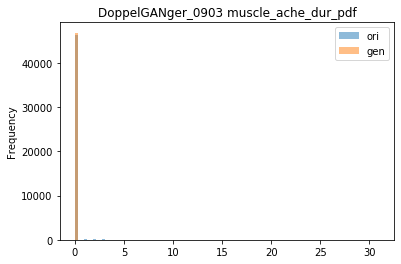

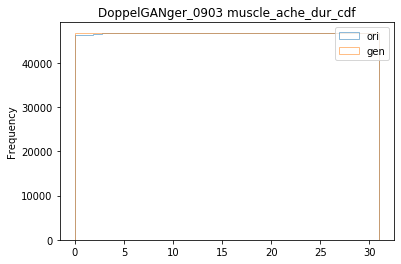

K-S test result: [0.01 1.  ]


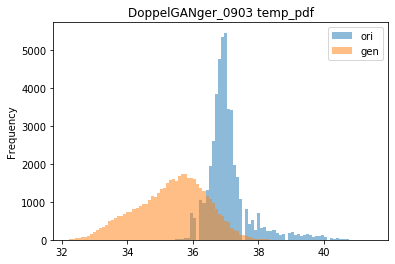

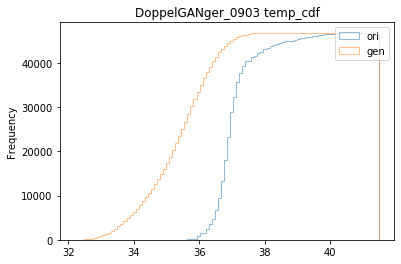

K-S test result: [7.97000000e-01 4.34638589e-27]


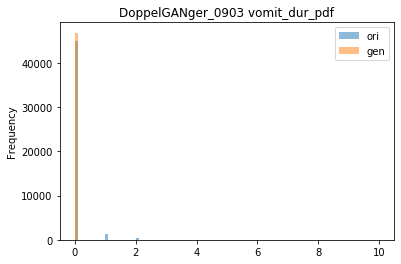

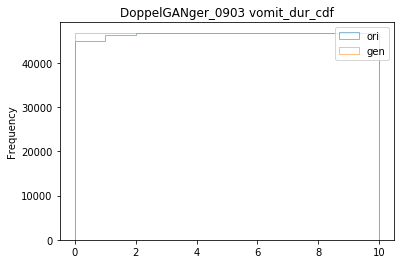

K-S test result: [0.088      0.77172391]


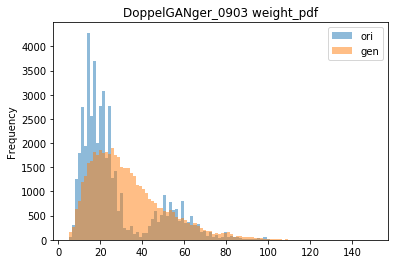

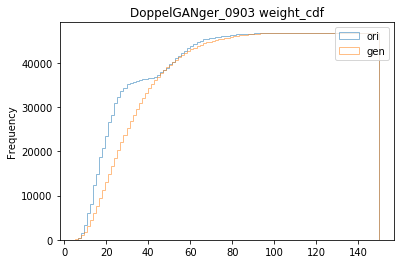

K-S test result: [0.28       0.02161626]


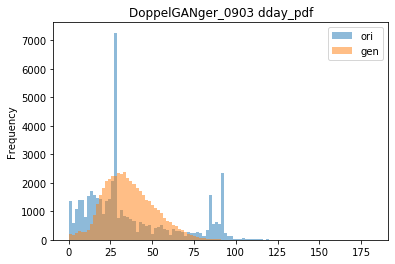

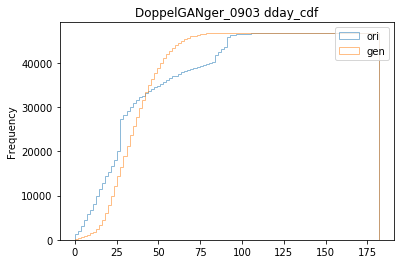

K-S test result: [0.288      0.00159226]


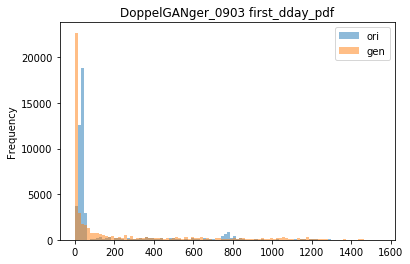

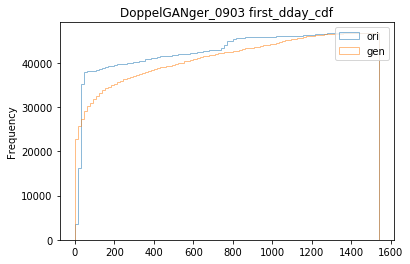

K-S test result: [4.62000000e-01 3.76761906e-07]


In [47]:
#Implement with all synthetic data and the corresponding real data.
for i in range(n):
    key = syn_keys[i]
    p_series = Histogram_KSTest(synthetic_num_dic[key][0],synthetic_num_dic[key][1],syn_name = key)
    if i == 0:
        p_df = pd.DataFrame(p_series,columns = [key])
    else:
        p_df = pd.concat([p_df,pd.DataFrame(p_series,columns = [key])],axis=1,sort = False)

### <u> Results cont. </u>

Table with p values of the Kolmogrov-Smirnov Test for each column, comparing the distribution of the original and the generated dataset. The closer the p values are to 1, the more similar the distribution of a column is between the original and the generated data.

In [48]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)
display('Kolmogrov-Smirnov Test p value table',p_df)

'Kolmogrov-Smirnov Test p value table'

,DoppelGANger_0903
ab_pain_dur,0.0000000
age,0.0620024
aneroxia_dur,0.0000000
plasmodium_density,0.0000000
cough_dur,0.0000002
diarrhea_dur,0.0000000
fatigue_dur,0.0000000
fever_dur,0.0013766
headache_dur,0.0000000
height,0.1176271


### <u> Conclusions </u>

<a id = "cat_link" Here ></a>

## <font color=#472F91> 1.2 Categorical variables distribution comparison </font>

### <u> Method description </u>

For categorical columns, the empirical distribution of each variable for all categorical columns is calculated for the synthetic dataset and the original dataset.
A dot plot compares the empirical distribution of each variable for the original data set on the x axis and for the synthetic dataset on the y axis, giving a visual perception of the similarity in diversity and distribution. The closer the dot to the y=x line, the higher the fidelity.
<br>To quantifiy this, the MSE (mean squared error) between the empirical distribution for the original and synthetic dataset is calculated for each variable and averaged.
<br><b>The lower the averaged MSE, the higher the fidelity.</b>

### <u> Results </u>

This table displays the probability distributions for each unique variable for each categorical column. The values are plotted on the scatter plot below with generated values on the x axis which are compared to the original values on the y axis. The MSE between the generated and the original probability distributions is supplied below.

In [17]:
#Implement with all synthetic data and the corresponding real data.
d_array = np.zeros(n)
df_cat_dict = {}
for i in range(n):
    key = syn_keys[i]
    distance, df_cat = Scatter_Distance(synthetic_cat_dic[key][0],synthetic_cat_dic[key][1],syn_name = key)
    df_cat_dict[key] = df_cat
    d_array[i] = distance
distance_series= pd.Series(d_array,index = syn_keys)
display('categorical_column-averaged MSE of probability distributions of original and generated data', distance_series)

,,DoppelGANger_0903 gen probability,DoppelGANger_0903 ori probability
complicated_malaria_no,True,0.021243,0.122032
complicated_malaria_not_assessed,True,0.978757,0.876216
complicated_malaria_yes,True,0.000000,0.001752
febrile_no,True,0.788703,0.686583
febrile_yes,True,0.211297,0.313417
ITN_no,True,0.000000,0.001731
ITN_not_applicable,True,0.028787,0.027762
ITN_yes,True,0.971213,0.970507
malaria_no,True,0.977218,0.876216
malaria_yes,True,0.022782,0.123784


'categorical_column-averaged MSE of probability distributions of original and generated data'

DoppelGANger_0903    0.004838
dtype: float64

### <u> Conclusions </u>

<a id = "pearsons_link" Here ></a>

## <font color=#472F91> 1.3 Pearson's Correlation Coefficient Comparison </font>

### <u> Method description </u>

To confirm dependencies between variables within columns are maintained, Pearson’s R correlation coefficient is calculated between categorical (all?) columns within the original and synthetic data. The R value measures the strength of association between 2 columns. Ideally, the real and synthetic data should have the same R value for a given pair of columns.
<br>To compare the datasets, we use two measurements. Firstly, the MSE (mean standard error) is calculated between each correlation coefficient.
<br><b>The lower the MSE, the higher the fidelity.</b>
<br>Secondly, the SRA (Synthetic Ranking Agreement) for each column is calculated. Here, the R correlation coefficients for the remaining columns are ranked for both the synthetic and the original data and compared.
<br><b>The closer SRA is to 1 the higher the fidelity.</b>

### <u> Results </u>

Two tables are displayed with the R correlation coefficient between all columns, for the original and for the generated data. For high level of correlation with an R > 0.5, the cell is coloured yellow. The fourth table displays the MSEs between the R correlation coefficients between the original and the generated data, displaying the result for each column.

In [62]:
n = len(syn_keys)
MSE_array = np.zeros(n)
for i in range(n):
    key = syn_keys[i]
    df_ori = synthetic_data_dic[key][0]
    df_gen = synthetic_data_dic[key][1]
    r_table_ori = r_corr_test(df_ori)
    r_table_gen = r_corr_test(df_gen)

    display(key+' '+'generated r table',r_table_gen.style.applymap(color_threshold_yellow))
    display(key+' '+'real r table',r_table_ori.style.applymap(color_threshold_yellow))
    sra = CorrelationSRA(r_table_ori,r_table_gen,ColumnWise=True)
    if i==0:
        sra_df = pd.DataFrame(sra,columns = [key])
    else:
        sra_df = pd.concat([sra_df,pd.DataFrame(sra,columns = [key])], axis = 1, sort = False)
    #display(key+' '+'SRA',sra)
    MSE_df, MSE_score = MSE(r_table_gen,r_table_ori)
    display(key+' '+'Table showing MSE of correlation coefficient R between columns', MSE_df)
    MSE_array[i] = MSE_score
MSE_series = pd.Series(MSE_array,index = syn_keys)

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


'DoppelGANger_0903 generated r table'

'DoppelGANger_0903 real r table'

'DoppelGANger_0903 Table showing MSE of correlation coefficient R between columns'

,id,ab_pain_dur,age,aneroxia_dur,plasmodium_density,cough_dur,diarrhea_dur,fatigue_dur,fever_dur,headache_dur,...,plasmodium_gametocytes_no,plasmodium_gametocytes_yes,plasmodium_lamp_negative,plasmodium_lamp_no_result,plasmodium_lamp_positive,visit_type_enrollment,visit_type_scheduled_visit,visit_type_unscheduled_visit,dday,first_dday
id,0.0000000,0.0000429,0.0002264,0.0094825,0.0000213,0.0126800,0.0204755,0.0001130,0.0142094,0.0000266,...,0.0014053,0.0014053,0.0120349,0.0029840,0.0074716,0.0016525,0.0023388,0.0039052,0.0651535,0.0285740
ab_pain_dur,0.0000429,0.0000000,0.0128281,0.0000349,0.0840074,0.0686624,0.1145833,0.0005085,0.0927941,0.0013007,...,0.0005341,0.0005341,0.0101118,0.0145776,0.0011706,0.0000741,0.0322637,0.0338984,0.0031129,0.0186011
age,0.0002264,0.0128281,0.0000000,0.0001282,0.0507867,0.0042190,0.0042356,0.0039210,0.1338926,0.0115406,...,0.0007817,0.0007817,0.0273476,0.0232655,0.0003286,0.0003730,0.0295216,0.0280419,0.0364389,0.0000721
aneroxia_dur,0.0094825,0.0000349,0.0001282,0.0000000,0.0020296,0.0004380,0.0654441,0.0003202,0.0128039,0.0212823,...,0.0000014,0.0000014,0.0081517,0.0119556,0.0015360,0.0002647,0.0233629,0.0255604,0.0010720,0.0129853
plasmodium_density,0.0000213,0.0840074,0.0507867,0.0020296,0.0000000,0.0508043,0.0025388,0.0089251,0.1543076,0.0895957,...,0.0000051,0.0000051,0.0062511,0.0113238,0.0028920,0.0002304,0.0154705,0.0170459,0.0006944,0.0174425
cough_dur,0.0126800,0.0686624,0.0042190,0.0004380,0.0508043,0.0000000,0.0294648,0.0237919,0.0147013,0.1277797,...,0.0004694,0.0004694,0.0003796,0.0030919,0.0010210,0.0033402,0.0215527,0.0160115,0.0799567,0.0001726
diarrhea_dur,0.0204755,0.1145833,0.0042356,0.0654441,0.0025388,0.0294648,0.0000000,0.0178525,0.0204952,0.0596019,...,0.0000892,0.0000892,0.0061406,0.0099648,0.0018554,0.0000029,0.0216106,0.0218600,0.0054788,0.0093259
fatigue_dur,0.0001130,0.0005085,0.0039210,0.0003202,0.0089251,0.0237919,0.0178525,0.0000000,0.0399521,0.0880835,...,0.0000009,0.0000009,0.0021417,0.0039624,0.0004966,0.0000849,0.0107959,0.0102512,0.0102095,0.0270430
fever_dur,0.0142094,0.0927941,0.1338926,0.0128039,0.1543076,0.0147013,0.0204952,0.0399521,0.0000000,0.0002171,...,0.0000000,0.0000000,0.0287918,0.0524037,0.0082346,0.0000795,0.1184780,0.1175948,0.0668184,0.0072379
headache_dur,0.0000266,0.0013007,0.0115406,0.0212823,0.0895957,0.1277797,0.0596019,0.0880835,0.0002171,0.0000000,...,0.0002438,0.0002438,0.0051459,0.0118160,0.0024303,0.0001819,0.0502118,0.0486674,0.0285412,0.0037648


### <u> Results cont. </u>

The averaged MSE for all columns between the orignal and generated data is presented below.
<br>The table below the MSE includes the SRA (Synthetic Ranking Accuracy) for each column where it's R correlation coefficients with the remaining columns are ranked for both the synthetic and the original data and compared.

In [9]:
display('averaged MSE values of R for each version of synthetic data', MSE_series)

'averaged MSE values of R for each version of synthetic data'

DoppelGANger_0903   0.0251338
dtype: float64

In [10]:
display('SRA: Ranking each column and comparing between original and generated data', sra_df)

'SRA: Ranking each column and comparing between ori and generated data'

,DoppelGANger_0903
id,0.3903061
ab_pain_dur,0.4515306
age,0.5663265
aneroxia_dur,0.4778912
plasmodium_density,0.4744898
cough_dur,0.5144558
diarrhea_dur,0.3971088
fatigue_dur,0.4872449
fever_dur,0.4438776
headache_dur,0.4209184


### <u> Conclusions </u>

<hr>

# <font color=#0275D8> 2. Fidelity Evaluation </font>

<a id = "tSNE_PCA_link" Here ></a>

## <font color=#472F91> 2.1 tSNE and PCA plots comparison </font>

### <u> Method description </u>

tSNE and PCA plots reduce a multi-dimensional dataset (i.e with multiple columns) into a 2-dimensional visualisation. 
<br>A machine-learning algorithm groups similar variables and although we cannot interpret the coordinates attributed, we can compare if the groupings made are similar in the original and synthetic data by overlaying the plots.
<br><b>The higher the overlay, the higher the fidelity.</b>

### <u> Results </u>

tSNE and PCA plot overlays for original and generated data

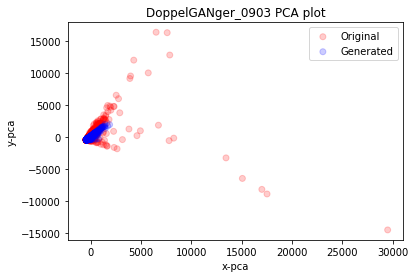

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.016s...
[t-SNE] Computed neighbors for 2000 samples in 1.524s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 18.356913
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.538223
[t-SNE] KL divergence after 300 iterations: 1.046280


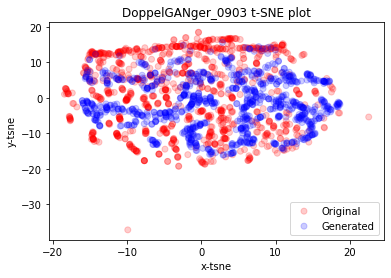

In [65]:
for i in range(n):
    key = syn_keys[i]
    dp_pca_results, dp_pca_hat_results = visualization(synthetic_array_dic[key][0], synthetic_array_dic[key][1], 'pca',syn_name = key)
    dp_tsne_results, dp_tsne_hat_results = visualization(synthetic_array_dic[key][0], synthetic_array_dic[key][1], 'tsne',syn_name = key)

### <u> Conclusions </u>

<a id = "discrim_link" Here ></a>

## <font color=#472F91> 2.2 Discriminative model performance </font>

### <u> Model Description </u>
For a quantitative measure of similarity, a post-hoc time-series classification model is trained (by optimizing a multi-layer GRU) to distinguish between sequences from the original and generated datasets.
First, each original sequence is labeled '1', and each generated sequence is labeled '0'.
<br>Then, an off-the-shelf (RNN) classifier is trained to distinguish between the two classes as a standard supervised task.
<br>An accuracy score on the held-out test set gives a quantitative assessment of fidelity.
<br><b>An accuracy score similar to the expected accuracy score for an untrained discriminative model indicates the discriminator cannot tell the difference between both datasets.</b>

### <u> Results </u>

A table with the report is displayed together with the expected accuracy and the obtained accuracy. The more similar these two values are, the better the fidelity of the generated data towards the original data.

In [10]:
for i in range(n):
    key = syn_keys[i]

    # train discriminative model
    train_data, val_data, test_data, train_labels, val_labels, test_labels = train_val_test_split(ori_data=synthetic_array_num_dic[key][0], gen_data=synthetic_array_num_dic[key][0])

    input_dim = np.asarray(synthetic_array_num_dic[key][0]).shape[2]
    d_model = discriminative_model(input_size=[None, input_dim], hidden_dim=64)

    # CHANGE TO MORE EPOCHS
    history_d_model = d_model.fit(train_data, train_labels, batch_size=128, epochs=10, validation_data=(val_data, val_labels), verbose=0)

    d_model.evaluate(test_data, test_labels)

    # get prediction from test data
    test_pred = np.round(d_model.predict(test_data))

    report = classification_report(test_labels, test_pred, digits=5, output_dict=True)
    report = pd.DataFrame(report).transpose()
    print(report)

    exp_acc = np.sum(test_labels)/np.shape(test_labels)[0]
    print('Expected accuracy for an untrained discriminative model = ', str(exp_acc))
    print('Final accuracy of trained discriminative model = ', str(accuracy_score(test_labels, test_pred)))

13/13 [==============================] - 0s 23ms/step - loss: 0.6924
              precision    recall  f1-score     support
0.0           0.0000000 0.0000000 0.0000000 205.0000000
1.0           0.4913151 0.9900000 0.6567164 200.0000000
accuracy      0.4888889 0.4888889 0.4888889   0.4888889
macro avg     0.2456576 0.4950000 0.3283582 405.0000000
weighted avg  0.2426248 0.4888889 0.3243044 405.0000000
Expected accuracy for an untrained discriminative model =  0.49382716049382713
Final accuracy of trained discriminative model =  0.4888888888888889


### <u> Conclusions </u>

<a id = "auto_link" Here ></a>

## <font color=#472F91> 2.3 Autocorrelation comparison </font>

### <u> Model description </u>

To confirm the variance in numerical values/counts over time are maintained, autocorrelation graphs are plotted for both datasets and overlayed.
<br><b>The higher the overlay, the higher the fidelity.</b>

In [25]:
# load in original original and generated csv already with date time and same column names as original original
from statsmodels.tsa.stattools import acf
import datetime as dt
import plotly.graph_objects as go

def subset (df, col):
    """
    ...
    """
    new_df=df[df[col].isin(["Yes","yes"])]
    
    return new_df

def auto_prep (df):
    """
    accepts a dataframe that contains date of events as input
    and computes the number of events that happen in a week

    Args:
    df: dataframe with visit date

    Returns:
    df: dataframe with visit date 
    table_freq: dataframe with number of events per week
    """

    # Remove empty days and transform visit date to date time data type
    df=df.dropna(subset=['Visit date [EUPATH_0000091]'])
    df['Visit date [EUPATH_0000091]'] = pd.to_datetime(df['Visit date [EUPATH_0000091]'])

    # Create visit week column containing date on MONDAY of the week the visit took place in:
    df['visit_week'] = df['Visit date [EUPATH_0000091]'].apply(lambda d: d-dt.timedelta(days=d.weekday()))
    
    # Create frequency table of event
    table_freq = pd.value_counts(df['visit_week']).to_frame().reset_index()
    table_freq = table_freq.set_index("index").sort_index()
    
    return df, table_freq

def autocorrelation (df_ori, df_gen, table_freq_ori, table_freq_gen):
    """
    plots autocorrelation for original and generate data

    Args:
    df_ori: dataframe of real data with dates
    df_gen: dataframe of gen data with dates
    table_freq_ori: dataframe with number of events per week for ori data, usually from auto_prep function
    table_freq_gen: dataframe with number of events per week for gen data, usually from auto_prep function

    Returns:
    acf_df: dataframe with autocorrelation values for real and gen data
    fig: figure to be plotted
    """
    
    #making sure the start and finish are the same and that weeks with no events are 0
    weeks_df = pd.date_range(start=min(df_ori['visit_week'].min(),df_gen['visit_week'].min()),end=max(df_ori['visit_week'].max(),df_gen['visit_week'].max()),freq='W-MON')
    weeks_df = pd.DataFrame(weeks_df)
    weeks_df.columns = ['index']
    weeks_df = weeks_df.set_index('index').sort_index()

    table_freq_ori = pd.merge(weeks_df,table_freq_ori,on="index", how='outer').fillna(0)
    table_freq_gen = pd.merge(weeks_df,table_freq_gen,on="index", how='outer').fillna(0)

    #autocorrelation from statsmodels.tsa.stattools
    acf_ori = acf(table_freq_ori['visit_week'],fft=False)
    acf_gen = acf(table_freq_gen['visit_week'],fft=False)
    
    acf_ori_df = pd.DataFrame(acf_ori)
    acf_gen_df = pd.DataFrame(acf_gen)
    
    acf_df = pd.concat([acf_ori_df, acf_gen_df], axis=1)
    acf_df.columns = ["original","generated"]

    #plotting using plotly go (change to this if other plots are done on plotly)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=acf_df.index, y=acf_df["original"],
                    mode='lines+markers',
                    name='original data'))
    fig.add_trace(go.Scatter(x=acf_df.index, y=acf_df["generated"],
                    mode='lines+markers',
                    name='generated data'))
    
    #plotting using matplotlib
    
    # fig = acf_df.plot.line()
    
    return acf_df, fig

### <u> Results </u>

The following plots show overlays of the autocorrelation plots for original and generated data for number of visits per week and number of positive malaria diagnosis per week.

In [26]:
ori_auto_5above, table_freq_visit_week_ori = auto_prep(ori_auto_5above)
gen_auto, table_freq_visit_week_gen = auto_prep(gen_auto)
acf_df_week_visits, autocorrelation_plot_week_visits=autocorrelation(ori_auto_5above,gen_auto,table_freq_visit_week_ori,table_freq_visit_week_gen)
display(autocorrelation_plot_week_visits)

In [28]:
malaria_ori=subset(ori_auto_5above,'Malaria diagnosis [EUPATH_0000090]')
malaria_gen=subset(gen_auto,'Malaria diagnosis [EUPATH_0000090]')

malaria_ori, table_freq_malaria_ori = auto_prep(malaria_ori)
malaria_gen, table_freq_malaria_gen = auto_prep(malaria_gen)
acf_df_malaria, autocorrelation_plot_malaria=autocorrelation(malaria_ori, malaria_gen, table_freq_malaria_ori, table_freq_malaria_gen)
display(autocorrelation_plot_malaria)

### <u> Conclusions </u>

<hr>

# <font color=#0275D8> 3. Usefulness evaluation </font>

<a id = "pred_link" Here ></a>

## <font color=#472F91> 3.1 Predictive model performance comparison </font>

### <u> Method description </u>

A series of commonly used regression based predictive models (Linear Regression, Linear Support Vector Regression, Random Forests Regression, Logistic Regression, Decision tree Regression and K-Nearest Neighbors Regression) are applied to the test samples and trained on the train samples for both the original and the synthetic data (Test-on-real, Train-on-real & Test-on-synthetic, Train-on-synthetic). The model attempts to predict a variable within a column based on the remaining columns.  
    The MSE (mean squared error) is calculated between the predicted value resulting from the predictive model and the test sample and averaged (MSE_1), resulting in MSE_1's for each column, for each predictive model, for the original and synthetic datasets (visualised in the first scatter plot below).  
    <br>To compare the datasets, the MSE between the MSE_1's of the original and the synthetic dataset is calculated (MSE_2), resulting in MSE_2's for each predictive model.
    <br>The average of MSE_1's for all columns is calculated between the datasets (MSE_3), resulting in MSE_3 for each predictive model, for the original and the synthetic dataset (visualised in the second scatter plot below).
    <br> To compare datasets, the MSE between the MSE_3's for the original and the synthetic data is calculated (MSE_4).
    <br><b>A low MSE_2/MSE_4 indicates the synthetic and original dataset behaved similarly in the predictive models.</b>
    <br>Because users to do not have access to the original data, synthetic data should behave similarly to the original data when trained using any algorithms.  
    To assess this, we use SRA (Synthetic Ranking Agreement) which focuses on measuring how similar algorithms perform when trained with original and synthetic data. The MSE_1's (MSE for each column) for each predictive model are ranked and the ranking  of the original and synthetic data are compared, resulting in SRA_1 for each column.
    <br>Similarly, the MSE_3's (column-averaged MSE) for each predictive model can be ranked, giving an SRA_2 measure.
    <br><b>SRA values close to 1 indicate the synthetic and original dataset behave similarly when trained on different predictive models.</b>

### <u> Results </u>

The following table shows the MSE_1's (i.e the prediction scores) obtained for each column for each predictive model in the original and in the generated data. 
<br>The original log(MSE_1) and the generated log(MSE_1) are used as coordinates for the scatter plot below. We use the log(MSE) (instead of the MSE) to simplify visualisation.
<br>The MSE's between the original and the generated data (MSE_2) can be seen below the scatter plots for each model. The averaged MSE between all models is also displayed.

In [21]:
# MSE_1
colmse_t = Comparison_Table(synthetic_num_dic, aver=False, models=['LR', 'KNR1', 'DTR'])
display(colmse_t)

DoppelGANger_0903                                                       \
                   ori                                                        
           ab_pain_dur        age aneroxia_dur plasmodium_density cough_dur   
LR            0.724008  57.441446     0.247072       1.185982e+09  2.052177   
KNR1          0.841441  27.826226     0.296056       1.434378e+09  2.513141   
DTR           1.453504  11.665967     0.489695       2.744930e+09  3.889777   

                                                                  ...  \
                                                                  ...   
     diarrhea_dur fatigue_dur fever_dur headache_dur      height  ...   
LR       0.200512    0.248117  0.715303     0.512630  130.644600  ...   
KNR1     0.236943    0.322361  1.049843     0.633751   75.873857  ...   
DTR      0.446496    0.537428  1.280049     0.905936   26.025270  ...   

                                                                         \
              gen                                                         
     headache_dur      height hemoglobin joint_pain_dur muscle_ache_dur   
LR       0.125345   54.196006   0.573596            0.0             0.0   
KNR1     0.103766  123.729702   1.751524            0.0             0.0   
DTR      0.042935   52.646925   0.664204            0.0             0.0   

                                                               
                                                               
          temp vomit_dur     weight        dday    first_dday  
LR    0.158089  0.000002  55.853203  117.829539  77170.417000  
KNR1  0.408397  0.000002  48.082735  158.662861  73942.366303  
DTR   0.161355  0.000001  17.174810  151.462737  11895.454193  

[3 rows x 36 columns]

In [7]:
plot_colmse(colmse_t)

In [15]:
# MSE_2
avg_modelmse_t = get_avg_mse_per_model(colmse_t)
print("Column-averaged MSE between real and generated data for each model")
display(avg_modelmse_t)

Column-averaged MSE between real and generated data for each model


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


,DoppelGANger_0903
LR,73795741168832560.0000000
KNR1,106214622246689664.0000000
DTR,266579512855870592.0000000


In [16]:
print("mean across models of the column-averaged-MSE ")
get_mean_avg_modelmse(avg_modelmse_t)

mean across models of the column-averaged-MSE 


,DoppelGANger_0903
mean model-averaged mse,139649666351315248.0000000


### <u> Results cont. </u>
The following table shows the column-averaged MSE's from MSE_1 values (MSE_3) for each predictive model for the original and synthetic data. 
<br>The original and generated MSE values are used as coordinates for the scatter plot below. 
<br> The MSE between the original and generated values (MSE_4) is shown below.

In [5]:
# MSE_3
com_t = Comparison_Table(synthetic_num_dic, aver=True, models=['LR', 'KNR1'])
print('column-averaged MSE for each model for the original and synthetic data')
display(com_t)

column-averaged MSE for each model for the original and synthetic data


DoppelGANger_0903              
               ori MSE       gen MSE
LR        7.307303e+07  1.019090e+06
KNR1      8.427182e+07  6.572096e+05

In [6]:
Scatter_TSTS_TRTR(com_t)

In [17]:
# MSE_4
print("model-averaged MSE of (column-averaged MSE between original and generated data)")
get_origen_mse(com_t)

model-averaged MSE of (column-averaged MSE between original and generated data)


,DoppelGANger_0903
avg ori gen MSE,5919762192493936.0000000


### <u> Results cont. </u>
This presents the SRA for each column (SRA_1), where the MSE_1's for each predictive model were ranked and compared between original and synthetic data. This is repeated for all the columns.
<br> The second table (SRA_2) displays the SRA value that was calculated using the column-averaged  MSE's (MSE_3) ranking the predictive models which is compared between the original and synthetic data. 

In [18]:
# SRA_1
sra_col_t = get_SRA_per_col(colmse_t, num_cols)
print("SRA: Ranking the MSE of each model compared between real and original data")
display(sra_col_t)

SRA: Ranking the MSE of each model compared between real and original data


DoppelGANger_0903                                                      \
          ab_pain_dur       age aneroxia_dur plasmodium_density cough_dur   
SRA         0.0000000 1.0000000    0.3333333          0.0000000 0.3333333   

                                                                          \
    diarrhea_dur fatigue_dur fever_dur headache_dur    height hemoglobin   
SRA    0.0000000   0.0000000 0.3333333    0.0000000 0.6666667  0.3333333   

                                                                            \
    joint_pain_dur muscle_ache_dur      temp vomit_dur    weight      dday   
SRA      0.0000000       0.0000000 0.3333333 0.0000000 1.0000000 0.6666667   

                
    first_dday  
SRA  0.3333333

In [19]:
# SRA_2
sra_E = SRA_TSTS_TRTR(com_t)
display(sra_E)

'SRA: Ranking MSE for each model between real and generated data'

DoppelGANger_0903   0.0000000
dtype: float64

### <u> Conclusions </u>

<a id = "tpred_link" Here ></a>

## <font color=#472F91> 3.2 Next-step predictive model performance comparison </font>

### <u> Method description </u>
This method has a similar principal to the previous method with the difference that the predictive model attempts to predict all variables for next time-step entry
    based on the values for previous time-stamps.
    <br>Here the predictive model provided by Tensorflow Keras API returns a test metric and a test loss for each column.
    <br>To compare between datasets, two parameters are determined.
    <br>Firstly, the MSE of the test loss/test metric is calculated between the real and the synthetic data for each column.
    <br>Secondly, the SRA is calculated, ranking the test metric/test loss of each column, and then comparing the rank for the synthetic and the original data.
    <br><b>A low MSE and an SRA close to 1 indicates the predictive model behaves similarly in attempting to predict the next time-step in both datasets.</b>

### <u> Results </u>
The following table gives a report on the test metric and test loss for each column when trained with with the number of epochs and windows described below.
<br> The scatter plots display the test metric or the test loss for the original data (x axis) and generated data (y axis) for each predicted column.
<br> Finally, the MSE of the test metric and the test loss for all columns is calculated between the original and the generated data. In parallel, the SRA is also calculated, where the test metric or test loss for each column is ranked and compared between the original and the generated data.

In [7]:
# CHANGE TO ALL COLUMNS and HAVE MORE EPOCHS
TxTx_tpred = TxTx_tpred_multiple(synthetic_array_num_dic, y_cols=[0,1,2], y_cols_name=num_cols[:3], windows=65, epochs=1, show_training=False)
TxTx_tpred


Predictive model running for column  ab_pain_dur  with window length  65
Getting results for column  ab_pain_dur  with window length  65
696/696 [==============================] - 5s 7ms/step - loss: 0.0300 - last_time_step_mae: 0.0042

Predictive model running for column  age  with window length  65
Getting results for column  age  with window length  65
696/696 [==============================] - 4s 6ms/step - loss: 2.2668 - last_time_step_mae: 0.3466

Predictive model running for column  aneroxia_dur  with window length  65
Getting results for column  aneroxia_dur  with window length  65
696/696 [==============================] - 5s 7ms/step - loss: 0.0195 - last_time_step_mae: 0.0015

Predictive model running for column  ab_pain_dur  with window length  65
Getting results for column  ab_pain_dur  with window length  65
696/696 [==============================] - 4s 6ms/step - loss: 0.1225 - last_time_step_mae: 0.0152

Predictive model running for column  age  with window length  65


DoppelGANger_0903                                                 \
              y_col test_loss_trtr test_metric_trtr test_loss_tsts   
0       ab_pain_dur       0.029968         0.004199       0.122480   
1               age       2.266751         0.346588       2.118075   
2      aneroxia_dur       0.019482         0.001511       0.113875   

                    
  test_metric_tsts  
0         0.015194  
1         0.296268  
2         0.014986

In [8]:
plot_TxTx_tpred(TxTx_tpred)

In [21]:
TxTx_tpred_mse = get_TxTx_mse(TxTx_tpred)
print("numerical_column-averaged MSE between TRTR and TSTS ")
TxTx_tpred_mse

numerical_column-averaged MSE between TRTR and TSTS 


DoppelGANger_0903            
                      test_loss metric_loss
trtr tsts MSE         0.0051756   0.0001340

In [22]:
TxTx_tpred_sra = get_TxTx_SRA(TxTx_tpred)
print("SRA: Ranking numerical columns between real and synthetic data")
TxTx_tpred_sra

SRA: Ranking numerical columns between real and synthetic data


DoppelGANger_0903            
            test_loss metric_loss
SRA         1.0000000   0.6666667

<hr>

# <font color=#0275D8> CSV exports </font>

In [69]:
##1.1 Histograms
##combine ori_num and gen_num
ori_num.columns=[str(col) + '_ori' for col in ori_num.columns]
gen_num.columns=[str(col) + '_gen' for col in gen_num.columns]
hist_df=pd.concat([ori_num, gen_num], axis=1, sort=False)
hist_df.to_csv('csv_results_0903/distribution_num_coordinates.csv')

##1.2 Categorical plots
#change 'DoppelGANger_0903 with version_name
df_cat_1 = df_cat_dict['DoppelGANger_0903']
# df_cat_1.to_csv('csv_results_0903/distribution_cat_coordinates.csv')

##2.1 tSNE and PCA plots
dp_pca_np = np.concatenate([dp_pca_results, dp_pca_hat_results], axis = 1)
dp_pca_df = pd.DataFrame(dp_pca_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
dp_pca_df.to_csv('csv_results_0903/pca_coordinates.csv', index=False)
dp_tsne_np = np.concatenate([dp_tsne_results, dp_tsne_hat_results], axis = 1)
dp_tsne_df = pd.DataFrame(dp_tsne_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
dp_tsne_df.to_csv('csv_results_0903/tsne_coordinates.csv', index=False)

##2.3 Autocorrelation
acf_df_week_visits.to_csv('csv_results_0903/autocorrelation_visitweeks.csv')
acf_df_malaria.to_csv('csv_results_0903/autocorrelation_malaria.csv')

##3.1 Predictive model
##still need to change colmse_t here to be able to export
log_colmse_t = np.log(colmse_t)
#log_colmse_t.to_csv('csv_results/MSE_1_coordinates_figure1.csv')
#com_t.to_csv('csv_results/MSE_3_coordinates_figure2.csv') #manually remove first row before seeding

##3.2 Time Predictive model
TxTx_tpred.to_csv('csv_results_0903/t_Predictive_coordinates.csv') #manually remove top row and first column b4 seeding